# Частина перша: Знайомство з Pandas.

In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"

In [29]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url, header=0, thousands=' ', decimal=',') 
table_index = 12 # Коефіцієнт народжуваності в регіонах України (1950—2019)
df = tables[table_index]

Замініть у таблиці значення "—" на значення NaN
Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [30]:
df = df.replace('—', np.nan)
columns = df.columns.values[1:] # Excluding 'Регіон' column
df[columns] = df[columns].apply(pd.to_numeric) # Change all columns type to numeric

Вивести перші рядки таблиці за допомогою методу head

In [6]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [7]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [8]:
df.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [31]:
df.drop([len(df)-1], inplace=True)

Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [32]:
mean_values = df.mean(numeric_only=True).round(1)
df.fillna(mean_values, inplace=True)

In [31]:
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.1,8.0
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,8.0
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [15]:
year = '2019'
avg = df[year].mean().round(1) # average for specified year
regions_above_average = df[year] > avg
df_more_avg = df[regions_above_average]

print(f"Average born rate in {year}: {avg}\n")
print(f'Regions with born rate more than average:')
df_more_avg[["Регіон"]]

Average born rate in 2019: 8.0

Regions with born rate more than average:


,Регіон
2,Волинська
6,Закарпатська
8,Івано-Франківська
12,Львівська
14,Одеська
16,Рівненська
20,Херсонська
23,Чернівецька
25,Київ


У якому регіоні була найвища народжуваність у 2014 році?

In [13]:
year = '2014'
max_this_year = df[year].max()
max_this_year_region = df[df[year]==max_this_year]
print(f'Region(s) with biggest born rate in {year}:')
max_this_year_region[["Регіон"]]

Region(s) with biggest born rate in 2014:


,Регіон
16,Рівненська


Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

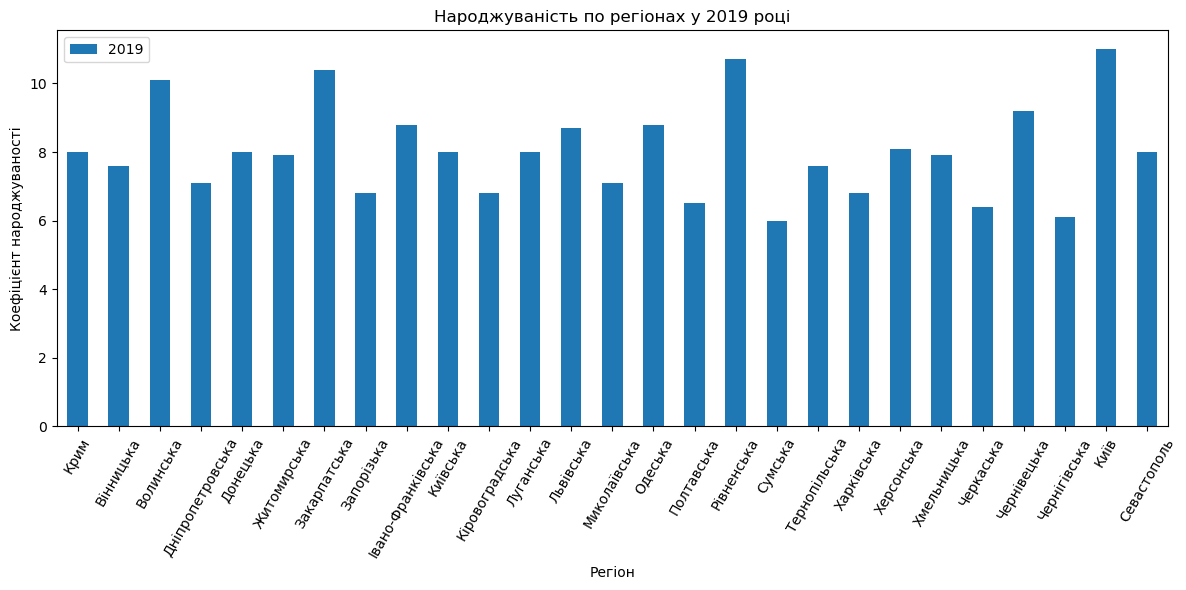

In [12]:
year = '2019'
data_year = df[['Регіон', year]]
data_year.plot(kind='bar', x='Регіон', y=year, figsize=(12, 6))

plt.xlabel(plt.xlabel('Рік'))
plt.ylabel('Коефіцієнт народжуваності')
plt.title(f'Народжуваність по регіонах у {year} році')
plt.xticks(rotation=60)
plt.tight_layout()

plt.show()

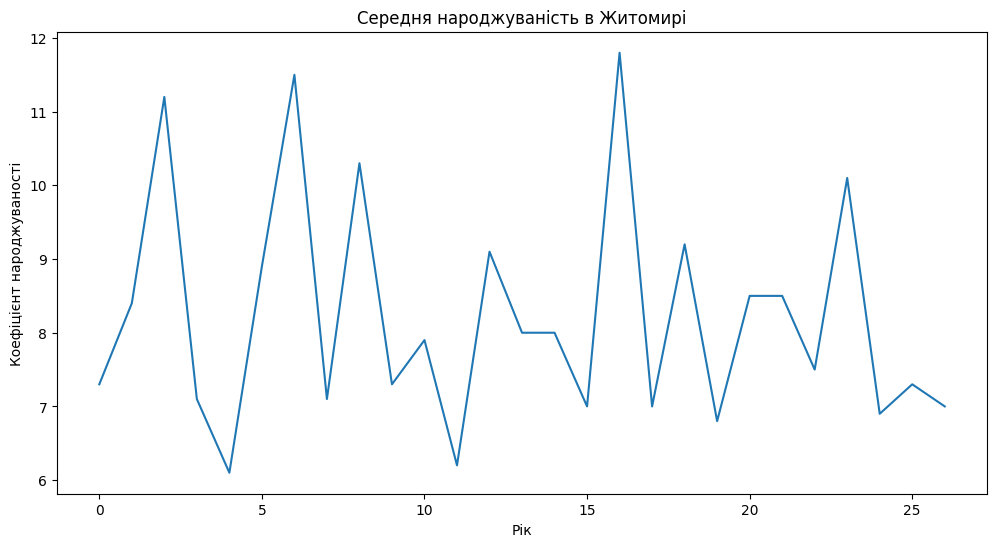

In [33]:
avg_born_rate = df[df.columns[5]]


avg_born_rate.plot(kind='line', figsize=(12, 6))
plt.title(f'Середня народжуваність в Житомирі')
plt.xlabel('Рік')
plt.ylabel('Коефіцієнт народжуваності')
plt.show()

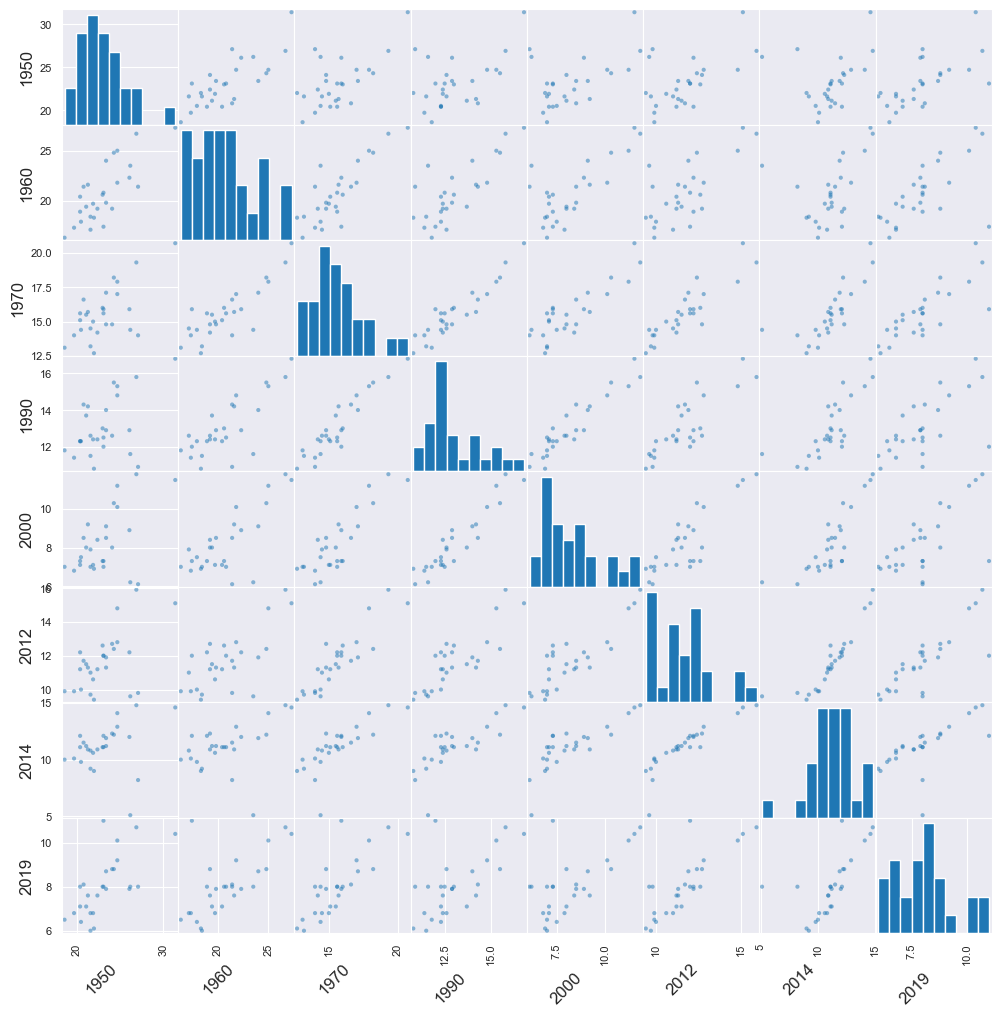

In [35]:
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(12, 12))
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.xaxis.label.set_rotation(45)
    ax.xaxis.label.set_ha('right')
plt.show()